## Investigating Netflix Movies Genre

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the CSV as a DataFrame
netflix_df = pd.read_csv("datasets/netflix_data.csv")

# Print the first five rows of the DataFrame
print(netflix_df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year  duration  \
0    August 14, 2020          2020         4   
1  December 23, 2016          2016        93   
2  December 20, 2018          2011        78   
3  November 16, 2017          2009        80   
4    January 1, 2020          2008       123

In [3]:
# Subset the DataFrame for type "Movie"
netflix_df_movies_only = netflix_df[netflix_df.type == "Movie"]

# Select only the columns of interest
netflix_movies_col_subset = netflix_df_movies_only[["title","country","genre", "release_year", "duration"]]

# Print the first five rows of the new DataFrame
print(netflix_movies_col_subset.head())

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


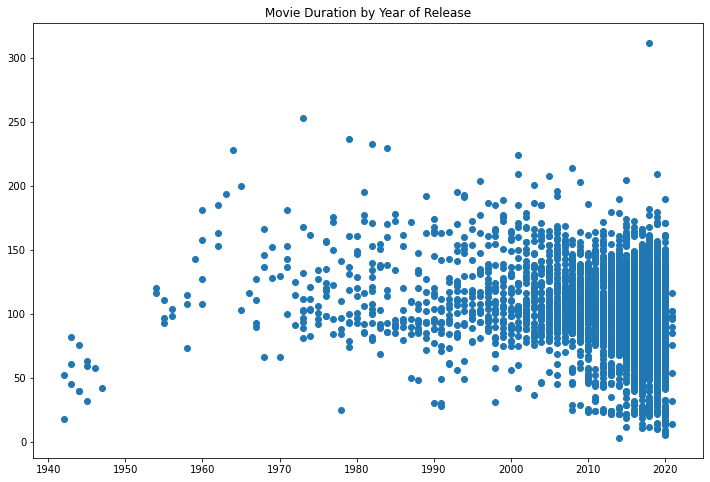

In [4]:
# Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus year
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration)
plt.title("Movie Duration by Year of Release")

# Show the plot
plt.show()

In [5]:
# Define an empty list
colors = []

# Iterate over rows of netflix_movies_col_subset
for lab,row in netflix_movies_col_subset.iterrows() :
    if row['genre'] == "Children" :
        colors.append("red")
    elif row['genre'] == "Documentaries"  :
        colors.append("blue")
    elif row['genre'] == "Stand-Up"  :
        colors.append("green")
    else:
        colors.append("black")
        
# Inspect the first 10 values in your list        
colors[0:10]

['black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'black',
 'blue']

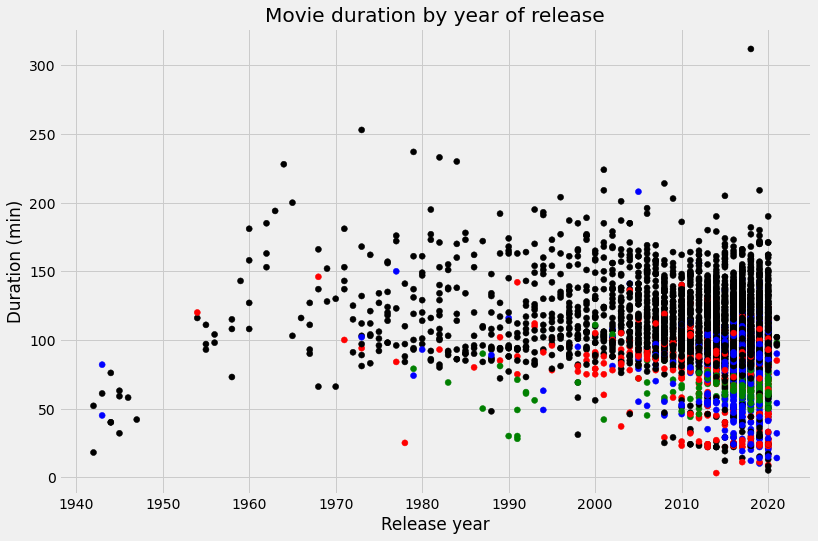

In [6]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset.release_year, netflix_movies_col_subset.duration, color=colors)

# Create a title and axis labels
plt.title("Movie duration by year of release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")

# Show the plot
plt.show()

In [7]:
# Filter for durations shorter than 60 minutes
short_movies = netflix_movies_col_subset[netflix_movies_col_subset.duration < 60]

# Print the first 20 rows of short_movies
print(short_movies.head(20))

                                                 title         country  \
35                                           #Rucker50   United States   
55                 100 Things to do Before High School   United States   
67   13TH: A Conversation with Oprah Winfrey & Ava ...             NaN   
101                                  3 Seconds Divorce          Canada   
146                                     A 3 Minute Hug          Mexico   
162  A Christmas Special: Miraculous: Tales of Lady...          France   
171                         A Family Reunion Christmas   United States   
177                    A Go! Go! Cory Carson Christmas   United States   
178                    A Go! Go! Cory Carson Halloween             NaN   
179                  A Go! Go! Cory Carson Summer Camp             NaN   
181             A Grand Night In: The Story of Aardman  United Kingdom   
200                            A Love Song for Latasha   United States   
220                         A Russell 

In [8]:
color_palette = sns.diverging_palette(150, 0, as_cmap = True)

<Figure size 864x576 with 0 Axes>

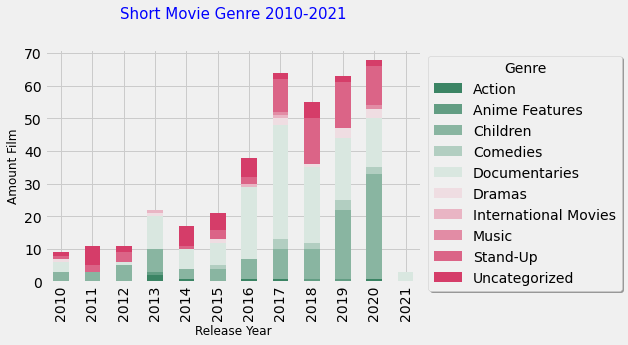

In [10]:
short_movies_10= short_movies[short_movies['release_year']>=2010]
fig = plt.figure(figsize=(12,8))
short_movies_10.groupby(['release_year'])['genre'].value_counts().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True,colormap=color_palette)
plt.title('Short Movie Genre 2010-2021', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Amount Film', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1, title='Genre')
labels, locations = plt.yticks()
plt.xticks(rotation=90)
#plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Movies Duration Distribution')

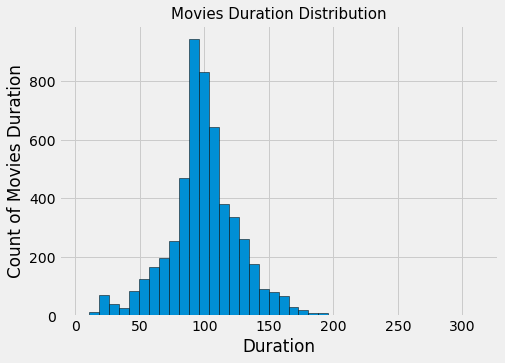

In [12]:
fig = plt.figure(figsize=(7,5))
plt.hist(netflix_movies_col_subset['duration'], edgecolor = 'black', bins=40)
plt.xlabel('Duration')
plt.ylabel('Count of Movies Duration')
plt.title('Movies Duration Distribution', fontsize=15)

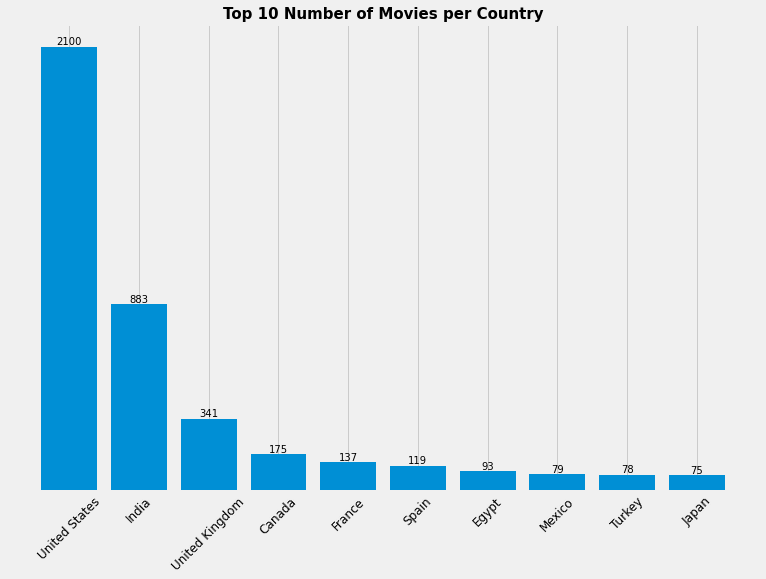

In [27]:
# instanciate the figure
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot()

# plot the data using matplotlib
ax.bar(country_movies.index, country_movies.values) # color=colors to add color

# iterate over every x and y and annotate the value on the top of the barchart
for i, (k, v) in enumerate(country_movies.items()):
    ax.text(k,
            v + 1, 
            v,
            fontsize=10,
            horizontalalignment='center',
            verticalalignment='bottom'
           )


# size of the x and y ticks
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)


# set a title for the plot
ax.set_title('Top 10 Number of Movies per Country', fontsize=15, fontweight='bold')
ax.get_yaxis().set_visible(False)

### Notes

1. The movies duration increase as the year goes by. Most of movies genre with duration less than 60 minutes are children, documentaris, and stand up. 
2. Movies with duration less than 60 increase from 2010-2020, especially children movies. Documentaries movies have highest number in 2017 and slightly decrease in following year. 
3. The most productive country release movies is United State, follow with India and United Kingdom.
4. In general most of movies has duration around 100 minutes